# Exercise 4.10 (Part 2)

## Table of content

1. Importing Libraries
2. Defining path
3. Importing Data set
4. Creating profile based on different variables
   1) Age-Group
   2) Dependants
   3) Income
5. Merging the department dataframe
6. Department wise shopping by different groups
7. Buying frequency and loyalty
8. Buying frequency and income group

### Importing Libraries 

In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [9]:
# Defining path

path = r'/Users/tanu/Desktop/Instacart Basket Analysis/02 Data'

In [11]:
# Importing Data frame

df_active = pd.read_pickle(os.path.join(path,'Prepared data','active_customer.pkl'))

### Create profiling based on different variables

#### 4.1 Grouping customers in age group

In [13]:
df_active.loc[df_active['Age'] < 25 ,'Age_group'] = 'Young_Adult'
df_active.loc[(df_active['Age'] >= 25) & (df_active['Age'] < 40),'Age_group'] = 'Adult'
df_active.loc[(df_active['Age'] >=40) & (df_active['Age'] <60),'Age_group'] = 'Middle_Age'
df_active.loc[df_active['Age'] >= 60,'Age_group'] = 'Senior'

In [15]:
df_active['Age_group'].value_counts(dropna = False)

Age_group
Senior         10574504
Middle_Age      9724950
Adult           7249916
Young_Adult     3415194
Name: count, dtype: int64

In [17]:
age_counts = df_active['Age_group'].value_counts(dropna = False)

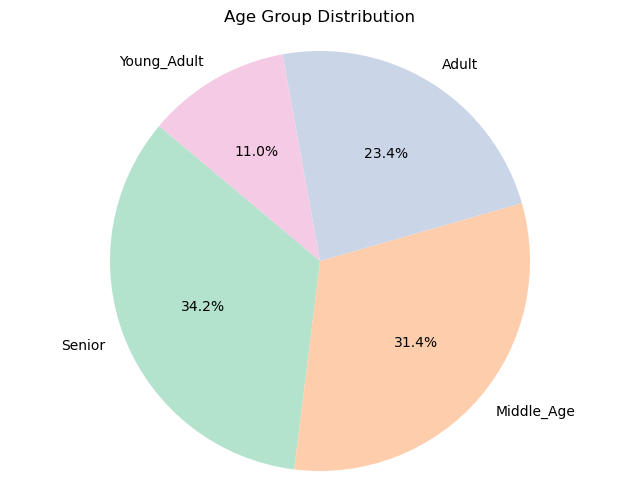

In [19]:
# pie chart for Age_group

pie = plt.figure(figsize=(8, 6))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140, colors = plt.cm.Pastel2.colors)
plt.title('Age Group Distribution')
plt.axis('equal')  # Equal aspect ratio makes the pie chart a circle
plt.show()

In [21]:
# Export the pie chart
pie.figure.savefig(os.path.join(path,'visualization','Age_group_pie.png'))

#### Obsevation : seniors and middle age accounts for more than 60 % purchases. should be more focus group, as these are the groups with more spending potential.

In [24]:
# Age_group vs income 

df_active.groupby('Age_group')['income'].mean()

Age_group
Adult           70585.090354
Middle_Age     113798.264879
Senior         115971.684913
Young_Adult     70759.742029
Name: income, dtype: float64

In [26]:
income_by_age_group = df_active.groupby('Age_group')['income'].mean()

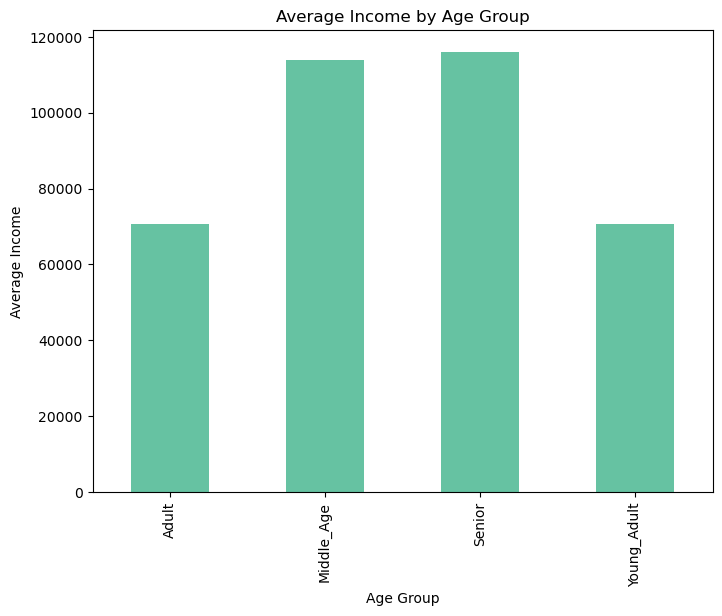

In [28]:
# plot 
bar_1 = plt.figure(figsize=(8,6))
income_by_age_group.plot(kind='bar', color = '#66c2a2')

plt.title('Average Income by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Income')
plt.show()

In [30]:
# Export the bar graph
bar_1.figure.savefig(os.path.join(path,'visualization','Age_group vs income graph.png'))

### 4.2 Dependants flag

In [33]:
df_active['No. of Dependants'].value_counts(dropna = False)

No. of Dependants
3    7772516
0    7739681
2    7733261
1    7719106
Name: count, dtype: int64

In [35]:
# Defining dependant flag
df_active.loc[df_active['No. of Dependants'] == 0 , 'dependant_flag'] = 'Single'
df_active.loc[df_active['No. of Dependants'] > 0 , 'dependant_flag'] = 'Family'

In [37]:
df_active['dependant_flag'].value_counts(dropna = False)

dependant_flag
Family    23224883
Single     7739681
Name: count, dtype: int64

In [71]:
dependant_counts = df_active['dependant_flag'].value_counts(dropna = False)

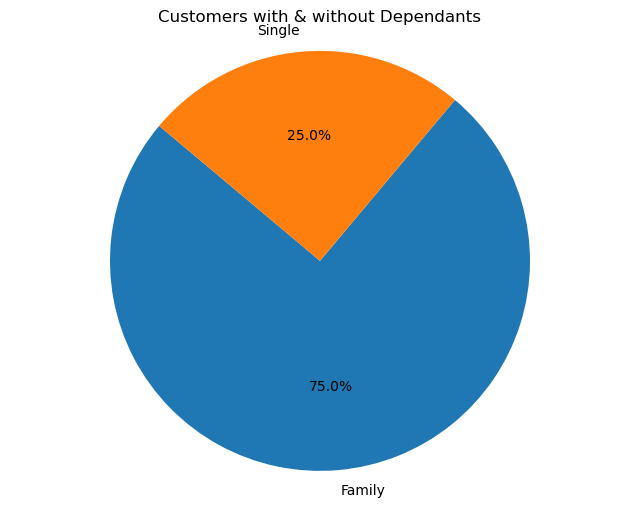

In [240]:
# pie chart for dependant_flag

pie_d = plt.figure(figsize=(8, 6))
plt.pie(dependant_counts, labels=dependant_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Customers with & without Dependants')
plt.axis('equal')  # Equal aspect ratio makes the pie chart a circle
plt.show()

#### Observation 75% customers are 'family members' with more than 1 dependants.


In [76]:
df_active.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_the_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'Match', 'price_range_loc', 'busiest_day',
       'Busiest_days', 'Busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spending', 'spending_label', 'days_btwn_orders',
       'order_frequency', 'First Name', 'Last Name', 'Gender', 'State', 'Age',
       'No. of Dependants', 'Marital status', 'income', 'Region',
       'activity_flag', 'Age_group', 'dependant_flag'],
      dtype='object')

In [78]:
df_active_small = df_active[['user_id','max_order','loyalty_flag','spending_label','order_frequency','Marital status','income','Age_group','dependant_flag']]

In [80]:
df_active_small.shape

(30964564, 9)

In [82]:
df_active_small['Marital status'].value_counts(dropna = False)

Marital status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

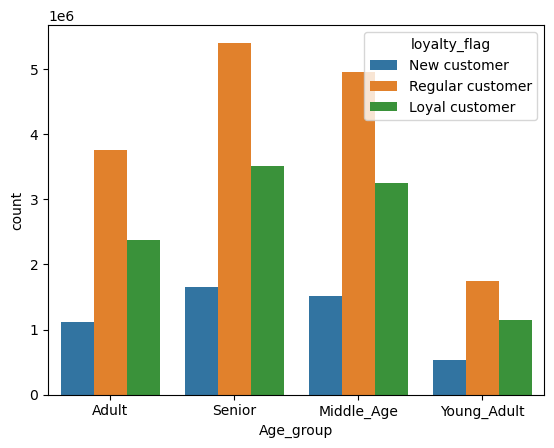

In [84]:
# Relation between Age_group and loyalty_flag
clusterbar_1 = sns.countplot(data=df_active_small, x='Age_group', hue='loyalty_flag')

#### Observation : People in senior and middle age group are more loyal and regular, follwed by adult shoppers.

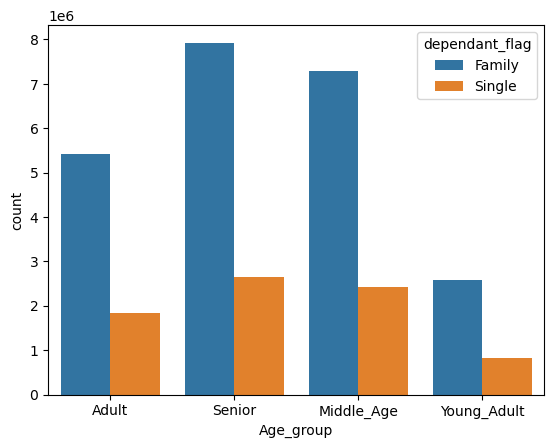

In [87]:
cluster_2 = sns.countplot(data= df_active_small, x= 'Age_group', hue = 'dependant_flag')

#### Observation : All age group have dependants , and people with dependants likely to buy more, as they are buying for more than one person.

### 4.3 Based on income

In [94]:
df_active.loc[df_active['income'] <=100000, 'income_group'] = 'Low earning group'
df_active.loc[df_active['income'] > 100000, 'income_group'] = 'High earing group'

In [97]:
income_counts = df_active['income_group'].value_counts(dropna=False)

In [99]:
income_counts

income_group
Low earning group    16757536
High earing group    14207028
Name: count, dtype: int64

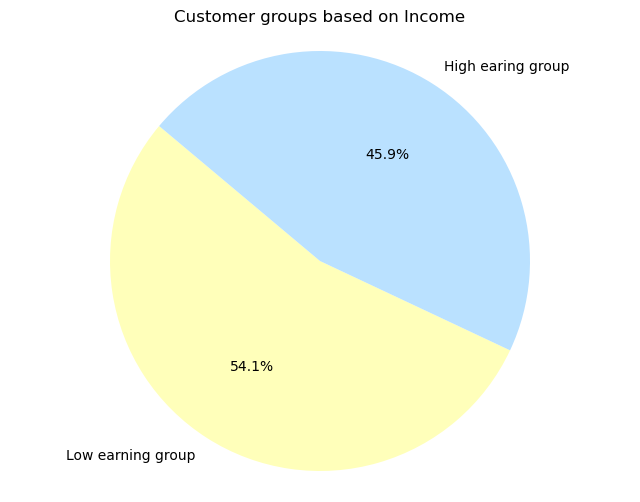

In [138]:
# pie chart for income_group
pastel_colors =['#FFFFBA','#BAE1FF']
pie_i = plt.figure(figsize=(8, 6))
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=140, colors = pastel_colors)
plt.title('Customer groups based on Income')
plt.axis('equal')  # Equal aspect ratio makes the pie chart a circle
plt.show()

### Merging the department dataframe 


In [107]:
df_dep = pd.read_csv(os.path.join(path,'Prepared data','departments_wrangled.csv'),index_col = False)

In [109]:
df_dep.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [111]:
df_dep.rename(columns = {'Unnamed: 0':'department_id'}, inplace = True)

In [113]:
df_dep.head

<bound method NDFrame.head of     department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       dairy eggs
16             17        household
17             18           babies
18             19           snacks
19             20             deli
20             21          missing>

In [115]:
df_dep.dtypes

department_id     int64
department       object
dtype: object

In [117]:
df_active['department_id'].dtypes

dtype('int64')

In [119]:
df_active.shape

(30964564, 37)

In [121]:
df_dep.shape

(21, 2)

#### Merging the two data frames

In [124]:
df_merge = df_active.merge(df_dep, on = 'department_id', indicator = True)

In [128]:
df_merge.shape

(30964564, 39)

In [130]:
df_merge.head()

,order_id,user_id,order_number,order_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,No. of Dependants,Marital status,income,Region,activity_flag,Age_group,dependant_flag,income_group,department,_merge
0,2539329,1,1,2,8,7.0,196,1,0,Soda,...,3,married,40423,South,normal activity,Adult,Family,Low earning group,beverages,both
1,2539329,1,1,2,8,7.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,3,married,40423,South,normal activity,Adult,Family,Low earning group,dairy eggs,both
2,2539329,1,1,2,8,7.0,12427,3,0,Original Beef Jerky,...,3,married,40423,South,normal activity,Adult,Family,Low earning group,snacks,both
3,2539329,1,1,2,8,7.0,26088,4,0,Aged White Cheddar Popcorn,...,3,married,40423,South,normal activity,Adult,Family,Low earning group,snacks,both
4,2539329,1,1,2,8,7.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,3,married,40423,South,normal activity,Adult,Family,Low earning group,household,both


In [132]:
# Most shoped department
dep_counts = df_merge['department'].value_counts().sort_values(ascending = True)

In [134]:
dep_counts

department
bulk                 33451
other                34411
missing              64768
pets                 93060
alcohol             144627
international       255991
babies              410392
personal care       424306
breakfast           670850
meat seafood        674781
household           699857
dry goods pasta     822136
deli               1003834
canned goods       1012074
bakery             1120828
pantry             1782705
frozen             2121731
beverages          2571901
snacks             2766406
dairy eggs         5177182
produce            9079273
Name: count, dtype: int64

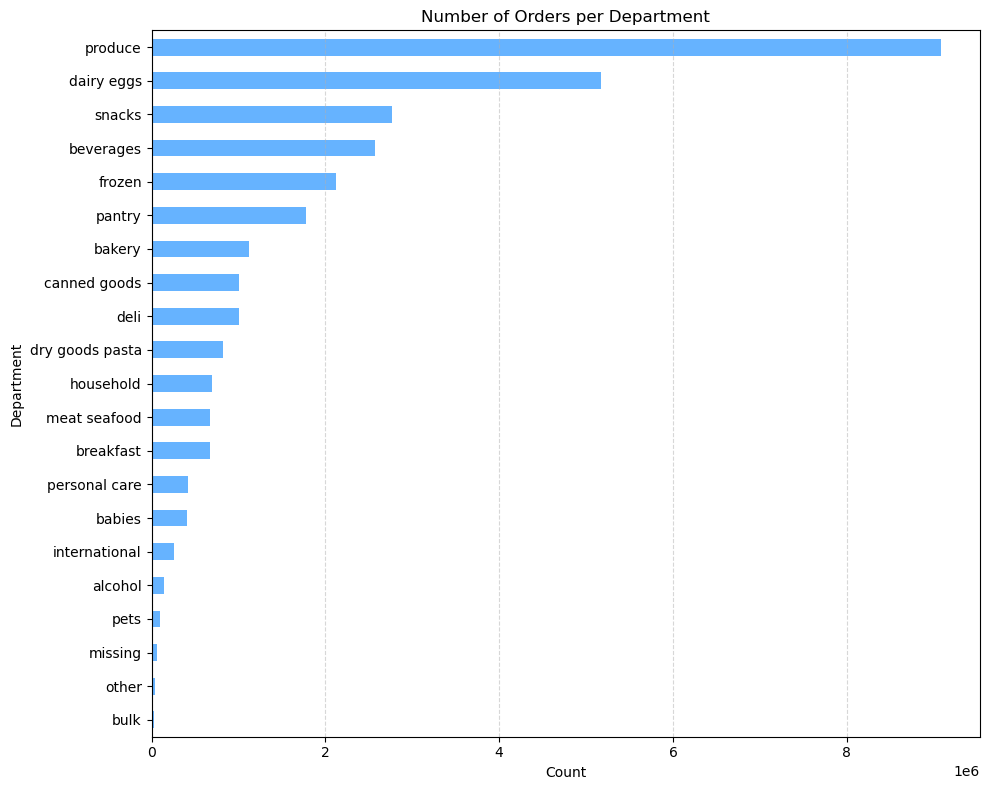

In [136]:
# Creating plot for departments
bar_2 = plt.figure(figsize=(10,8))
dep_counts.plot(kind='barh',color='#66b3ff')
plt.title('Number of Orders per Department')
plt.xlabel('Count')
plt.ylabel('Department')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [140]:
# exporting the plots 
bar_2.figure.savefig(os.path.join(path,'Number of Orders per Department.png'))
cluster_2.figure.savefig(os.path.join(path,'Age_group and Dependant_flag.png'))
clusterbar_1.figure.savefig(os.path.join(path,'Age_group and loyalty_flag.png'))

In [142]:
# Crosstab for popular department with department flag
dep_crosstab = pd.crosstab(df_merge['department'],df_merge['dependant_flag'],dropna=False)

In [144]:
dep_sorted = dep_crosstab.sort_values(by='Family', ascending=True)

<Figure size 1200x1400 with 0 Axes>

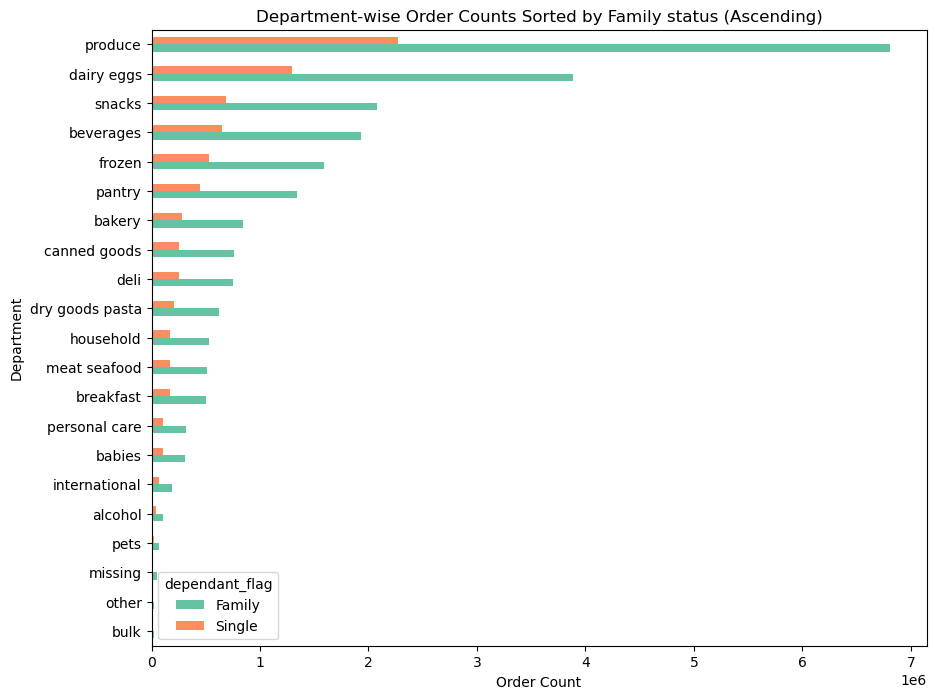

In [260]:
# creating plot
bar_f =plt.figure(figsize=(12, 14))
ax = dep_sorted.plot(kind='barh', figsize=(10,8), color=['#66c2a5', '#fc8d62'])
plt.title('Department-wise Order Counts Sorted by Family status (Ascending)')
plt.xlabel('Order Count')
plt.ylabel('Department')
plt.show()

In [149]:
# Pantry items
df_pantry = df_merge[df_merge['department_id']==13]

In [157]:
item_counts_1 = df_pantry['dependant_flag'].value_counts(dropna = False)

In [159]:
item_counts_1

dependant_flag
Family    1338801
Single     443904
Name: count, dtype: int64

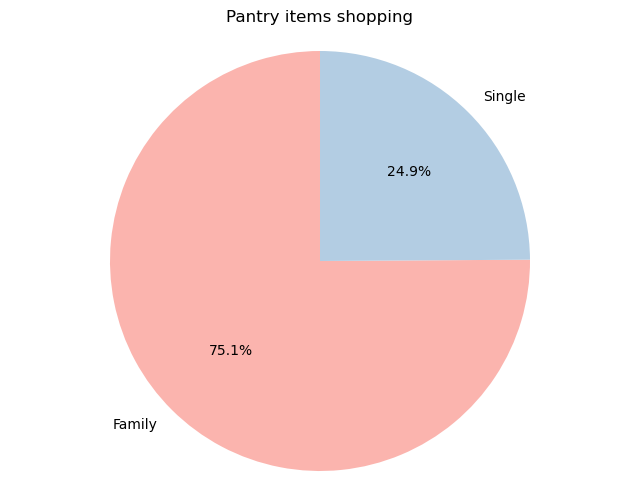

In [161]:
pie_2 = plt.figure(figsize=(8,6))
plt.pie(item_counts_1, labels = item_counts_1.index, autopct='%1.1f%%',startangle=90, colors = plt.cm.Pastel1.colors)
plt.title('Pantry items shopping')
plt.axis('equal')
plt.show()

In [163]:
item_counts_3 = df_pantry['Age_group'].value_counts(dropna = False)

In [165]:
item_counts_3

Age_group
Senior         609961
Middle_Age     560582
Adult          415461
Young_Adult    196701
Name: count, dtype: int64

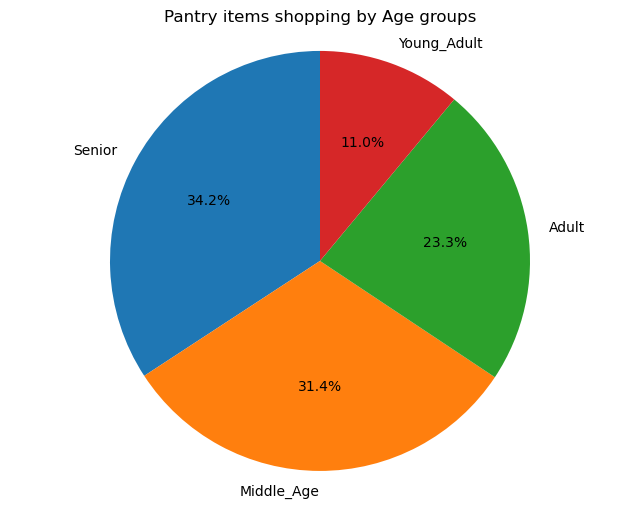

In [167]:
pie_3 = plt.figure(figsize=(8,6))
plt.pie(item_counts_3, labels = item_counts_3.index, autopct='%1.1f%%',startangle=90)
plt.title('Pantry items shopping by Age groups')
plt.axis('equal')
plt.show()

### buying frequency and loyalty


In [170]:
df_merge['loyalty_flag'].value_counts(dropna=False)

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         4803695
Name: count, dtype: int64

In [178]:
df_merge.groupby('loyalty_flag').agg({'days_since_prior_order':['min','max','mean','std','median']})

days_since_prior_order                                   
                                    min   max       mean        std median
loyalty_flag                                                              
Loyal customer                      0.0  30.0   6.044517   4.520962    5.0
New customer                        0.0  30.0  16.103911  10.047807   13.0
Regular customer                    0.0  30.0  11.896974   8.318011    9.0

In [184]:
median = df_merge.groupby('loyalty_flag')['days_since_prior_order'].median()

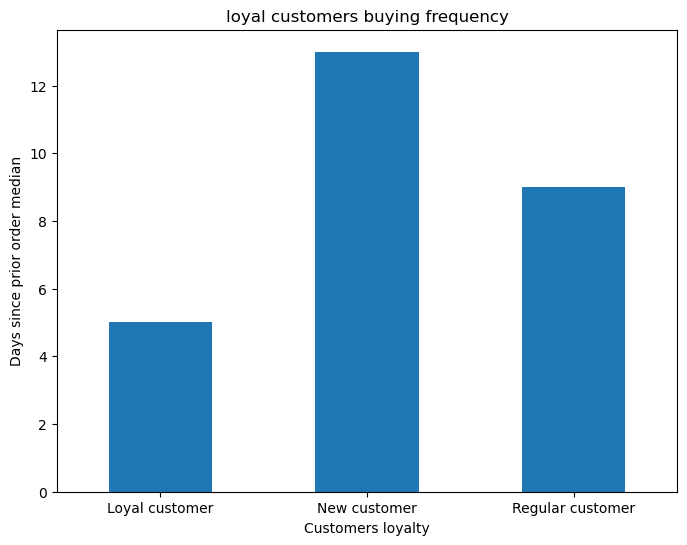

In [186]:
# bar plot
bar_4 = median.plot(kind='bar',figsize=(8,6))
plt.title('loyal customers buying frequency')
plt.xlabel('Customers loyalty')
plt.ylabel('Days since prior order median')
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.show()

### Produce shopping

In [189]:
df_produce = df_merge[df_merge['department_id']== 4]

In [190]:
df_produce.shape

(9079273, 39)

In [193]:
item_count_4 = df_produce['dependant_flag'].value_counts(dropna = False)

In [195]:
item_count_4

dependant_flag
Family    6803832
Single    2275441
Name: count, dtype: int64

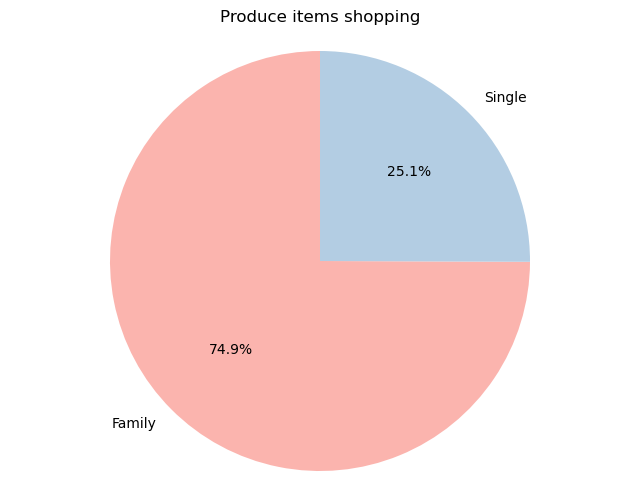

In [197]:
pie_4 = plt.figure(figsize=(8,6))
plt.pie(item_count_4, labels = item_count_4.index, autopct='%1.1f%%',startangle=90, colors = plt.cm.Pastel1.colors)
plt.title('Produce items shopping')
plt.axis('equal')
plt.show()

In [199]:
item_count_5 = df_produce['loyalty_flag'].value_counts(dropna = False)

In [201]:
item_count_5

loyalty_flag
Regular customer    4595293
Loyal customer      3147376
New customer        1336604
Name: count, dtype: int64

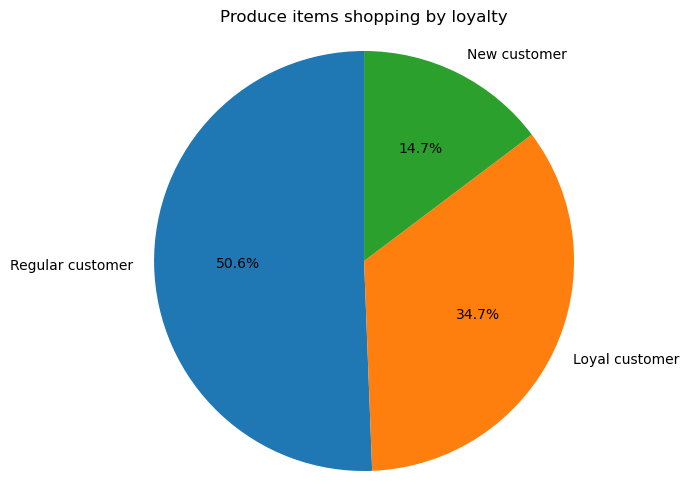

In [203]:
pie_5 = plt.figure(figsize=(8,6))
plt.pie(item_count_5, labels = item_count_5.index, autopct='%1.1f%%',startangle=90)
plt.title('Produce items shopping by loyalty')
plt.axis('equal')
plt.show()

In [207]:
# exporting the graphs
pie_5.figure.savefig(os.path.join(path,'visualization','produce by loyalty.png'))
pie_4.figure.savefig(os.path.join(path,'visualization','produce item shoping.png'))
bar_4.figure.savefig(os.path.join(path,'visualization','loyal customer buying frequency.png'))
pie_3.figure.savefig(os.path.join(path,'visualization','pantry item by age group.png'))
pie_2.figure.savefig(os.path.join(path,'visualization','pantry items by dependency.png'))
bar_3.figure.savefig(os.path.join(path,'visualization','produce order by family status.png'))
pie_d.figure.savefig(os.path.join(path,'visualization','Customers with and without Dependants.png'))
pie_i.figure.savefig(os.path.join(path,'visualization','Customers group based on income.png'))

### Region wise customers based on spending level

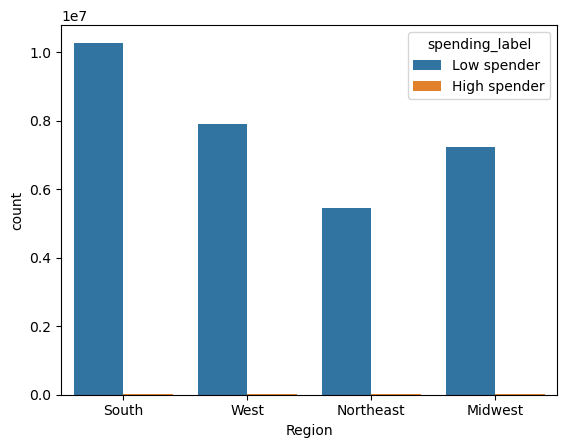

In [210]:
clusterbar = sns.countplot(data = df_active, x= 'Region', hue ='spending_label')

In [212]:
clusterbar.figure.savefig(os.path.join(path,'visualization','spending flag by region.png'))

### Income group and shopping frequency

In [217]:
df_merge.groupby('income_group').agg({'days_since_prior_order':['min','max','mean','std','median']})

days_since_prior_order                                  
                                     min   max       mean       std median
income_group                                                              
High earing group                    0.0  30.0  10.569025  8.382811    7.0
Low earning group                    0.0  30.0  10.637113  8.394747    7.0

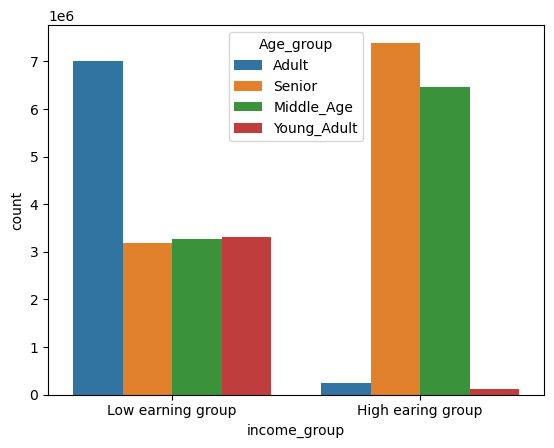

In [219]:
# Bar chart to illustrate the relationship between age and income
clusterbar_i = sns.countplot(data=df_active, x='income_group', hue='Age_group')

In [221]:
median_i = df_merge.groupby('income_group')['days_since_prior_order'].median()

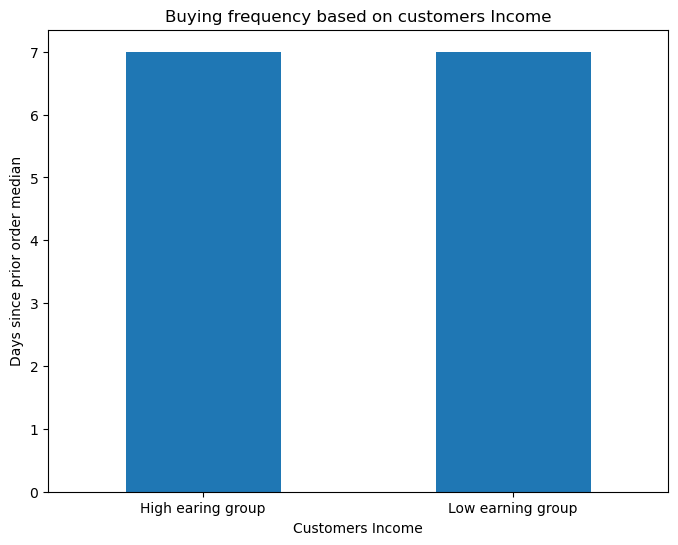

In [223]:
# bar plot
bar_i = median_i.plot(kind='bar',figsize=(8,6))
plt.title('Buying frequency based on customers Income')
plt.xlabel('Customers Income')
plt.ylabel('Days since prior order median')
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.show()

In [266]:
bar_i.figure.savefig(os.path.join(path,'visualization','buying frequency based on income.png'))
clusterbar_i.figure.savefig(os.path.join(path,'visualization','age and income relationship.png'))

### The End 